In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [4]:
import pandas as pd
import seaborn as sns
sns.set_context('poster', font_scale=1.25)
sns.set_style('darkgrid')

In [6]:
import growth_curve_analysis as od

In [7]:
sliding_test = od.analyze_experiment('./test_data.xlsx', method='sliding_window', blank=0.1, out_dir = './')

created experiment
input samples
analyzed samples
created output data file


In [8]:
sliding_noblank = od.analyze_experiment('./test_data.xlsx', method='sliding_window', out_dir = './')

created experiment
input samples
analyzed samples
created output data file


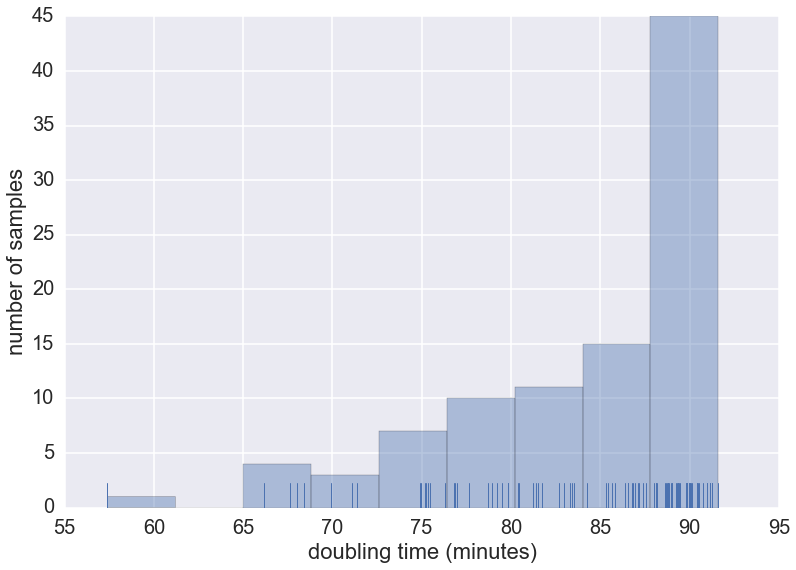

/Users/nmcollin/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


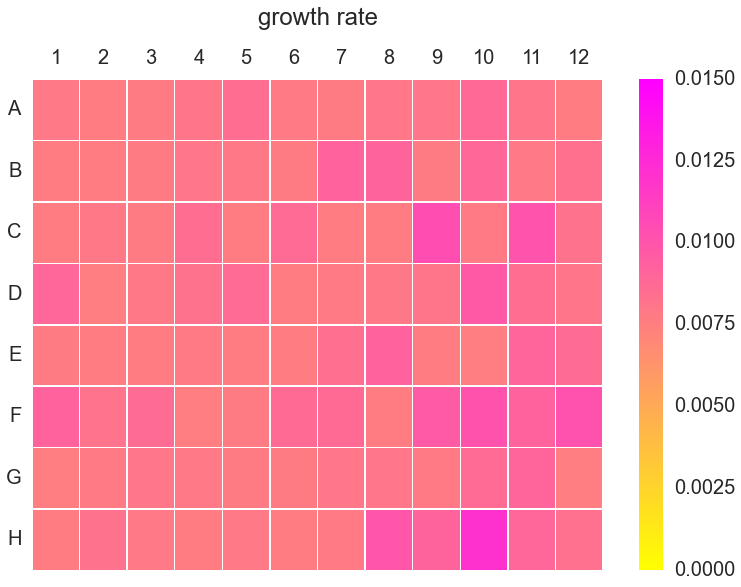

In [9]:
od.make_plots(sliding_test, save=True)

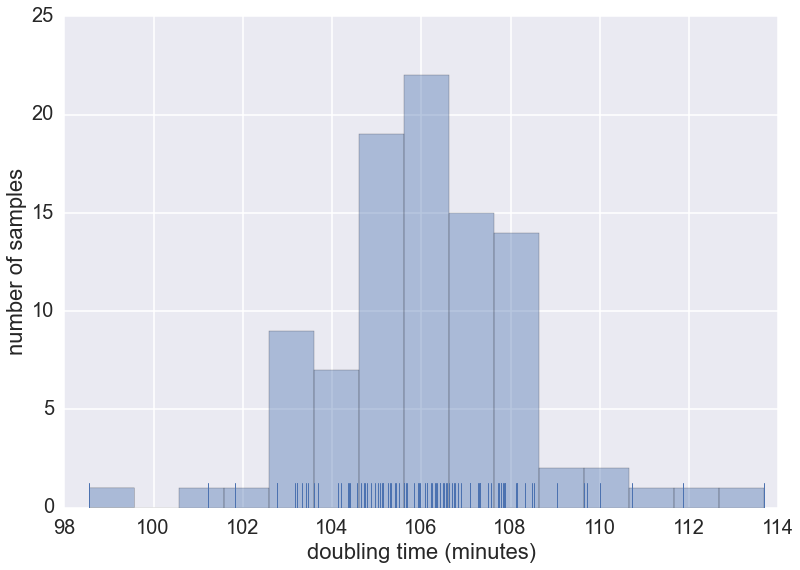

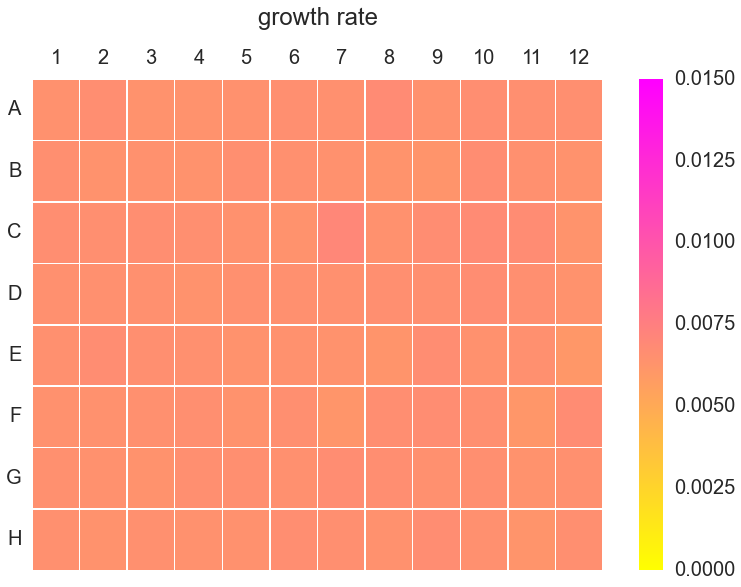

In [10]:
od.make_plots(sliding_noblank, save=True)

In [12]:
sliding_test.results['noise'] = np.where(sliding_test.results['column']>6, 'high', 'low')
sliding_noblank.results['noise'] = np.where(sliding_noblank.results['column']>6, 'high', 'low')

In [13]:
low_noise_blank = sliding_test.results[sliding_test.results['noise'] == 'low']
high_noise_blank = sliding_test.results[sliding_test.results['noise'] == 'high']
low_noise_noblank = sliding_noblank.results[sliding_noblank.results['noise'] == 'low']
high_noise_noblank = sliding_noblank.results[sliding_noblank.results['noise'] == 'high']

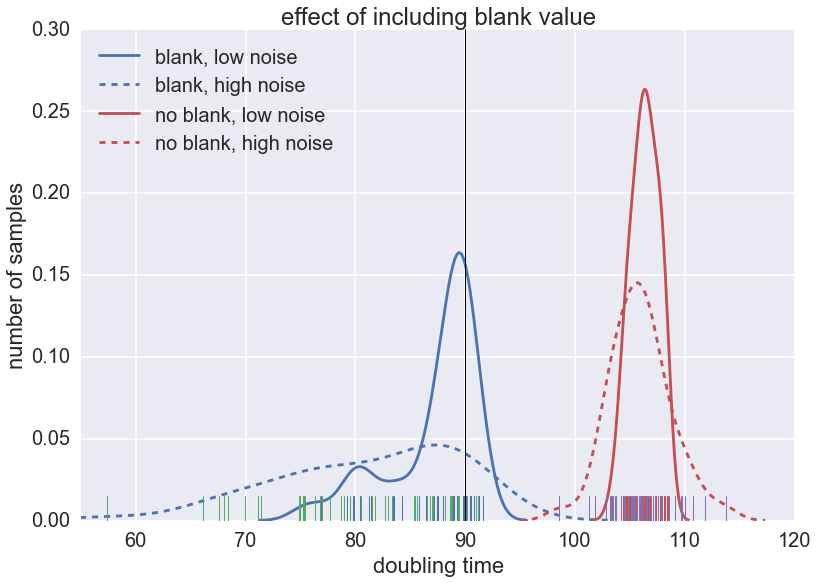

In [20]:
sns.distplot(low_noise_blank['doubling time'].dropna(), hist=False, kde=True, rug=True, label='blank, low noise', 
            kde_kws={'color':sns.color_palette()[0], 'linestyle':'-'})
sns.distplot(high_noise_blank['doubling time'].dropna(), hist=False, kde=True, rug=True, label='blank, high noise', 
            kde_kws={'color':sns.color_palette()[0], 'linestyle':'--'})
sns.distplot(low_noise_noblank['doubling time'].dropna(), hist=False, kde=True, rug=True, label='no blank, low noise',
            kde_kws={'color':sns.color_palette()[2], 'linestyle':'-'})
sns.distplot(high_noise_noblank['doubling time'].dropna(), hist=False, kde=True, rug=True, label='no blank, high noise',
            kde_kws={'color':sns.color_palette()[2], 'linestyle':'--'})
plt.axvline(90, color='k', linewidth=1)
plt.ylabel('number of samples')
plt.xlim(55, 120)
plt.title('effect of including blank value')
plt.savefig('./blank_doubling_hist.png')

What is the effect of removing lower OD values from analysis?

In [37]:
A1 = sliding_test.samples['A1']

In [50]:
mask_log_data = np.ma.masked_less(A1.log_data, -2.3)

In [55]:
mask_log_data

masked_array(data = [-- -- -- -- -- -- -- -2.290469273132837 -- -- -- -2.280010247591429 -- --
 -- -2.2678701748468955 -- -- -- -2.2529383785203585 -2.237895483198744
 -2.193385472623686 -2.197092625672425 -2.0583271630270317
 -2.0398861303934166 -1.889756916788715 -1.8388714105489188
 -1.7818454380282205 -1.684557981991398 -1.6548137488854555
 -1.5433536465239135 -1.4483487062720117 -1.356003591655743
 -1.3044562610530859 -1.2325073979446832 -1.1380989865900095
 -1.0699430571680333 -0.9810143257250697 -0.9174028737444306
 -0.8312254969171158 -0.7499261318049073 -0.6874378696616825
 -0.6199934950843773 -0.5234801640581334 -0.44527515064668577
 -0.37361236590601815 -0.3050870308755973 -0.22390149971045983
 -0.14209702933450621 -0.10742326742913506 -0.1025128668278994
 -0.10339371814045638 -0.1003595559148772 -0.09681328253717851
 -0.09762342609592937 -0.09539592399720209 -0.09582880466126072
 -0.0935128999480765 -0.0976834071123491 -0.09421361470979304
 -0.09417173715589723 -0.089334834

In [57]:
sliding_test2 = od.analyze_experiment('./test_data.xlsx', method='sliding_window', blank=0.1, out_dir = './')

created experiment
input samples
analyzed samples
created output data file


In [97]:
sliding_droplow = od.analyze_experiment('./test_data.xlsx', method='sliding_window', blank=0.1, 
                                        out_dir = './', droplow=True)

created experiment
input samples
analyzed samples
created output data file


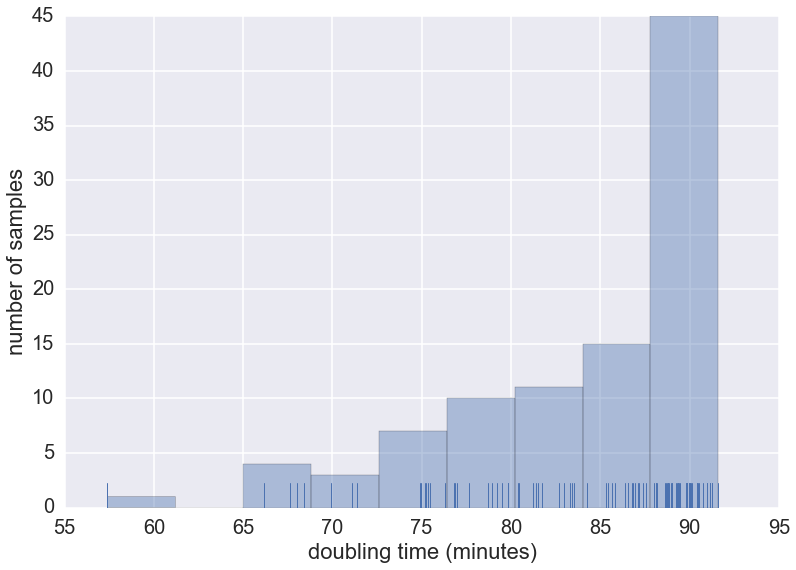

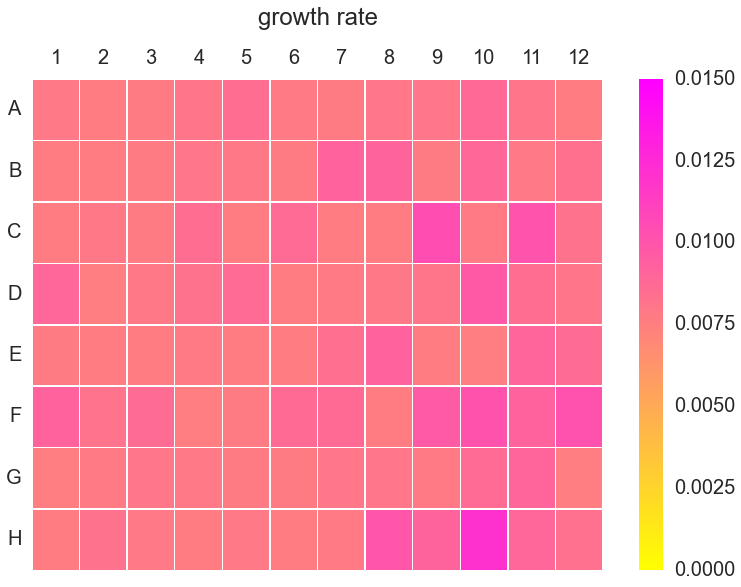

In [59]:
od.make_plots(sliding_test2)

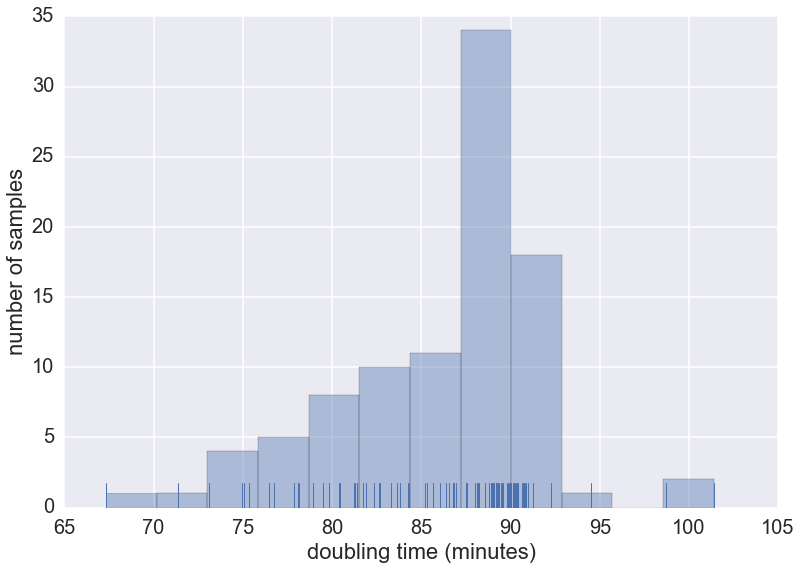

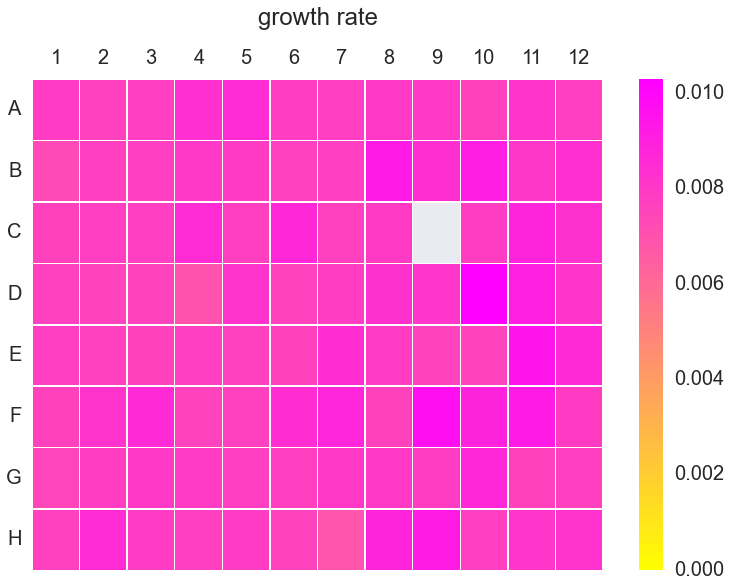

In [98]:
od.make_plots(sliding_droplow)

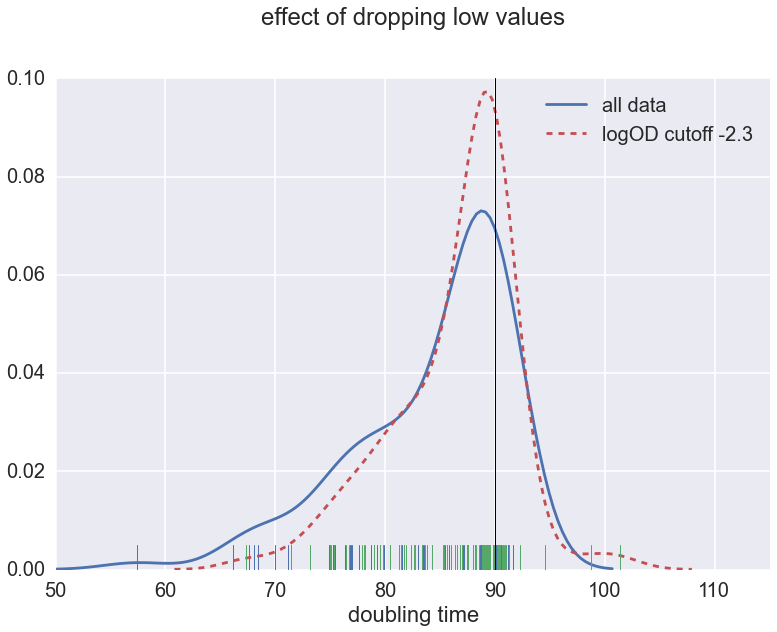

In [103]:
sns.distplot(sliding_test2.results['doubling time'].dropna(), hist=False, kde=True, rug=True, label='all data',
             kde_kws={'color':sns.color_palette()[0], 'linestyle':'-'})
sns.distplot(sliding_droplow.results['doubling time'].dropna(), hist=False, kde=True, rug=True, label='logOD cutoff -2.3',
             kde_kws={'color':sns.color_palette()[2], 'linestyle':'--'})
plt.axvline(90, color='k', linewidth=1)
plt.xlim(50, 115)
plt.title('effect of dropping low values', y=1.1)
plt.savefig('./droplow_doubling_hist.png')

In [65]:
high_rates = sliding_test2.results[sliding_test2.results['doubling time']<80]

In [107]:
dt_compare = pd.concat([sliding_test2.results['doubling time'], sliding_droplow.results['doubling time']], axis=1)
dt_compare['comparison'] = (sliding_test2.results['doubling time'] == sliding_droplow.results['doubling time'])
dt_compare[:15]

,doubling time,doubling time,comparison
1,88.161094,88.161094,True
2,89.875256,89.875256,True
3,89.216479,89.216479,True
4,85.799123,82.633115,False
5,81.210335,81.210335,True
6,88.875839,88.875839,True
7,89.325607,89.325607,True
8,86.551620,86.551620,True
9,86.794788,86.794788,True
10,78.700848,90.380651,False


In [109]:
compare_map = pd.concat([sliding_test2.results['row'], sliding_test2.results['column'], 
                         dt_compare['comparison']], axis=1)

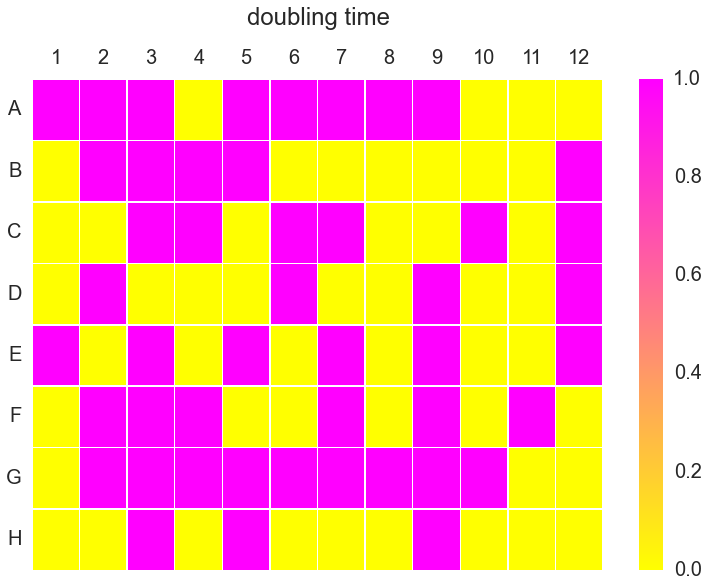

In [110]:
compare_arr = np.empty((8, 12))  # assume 96-well plate
compare_arr.fill(np.nan)
compare_arr[(compare_map['row']-1), (compare_map['column']-1)] = compare_map['comparison']
data = pd.DataFrame(compare_arr, index=['A','B','C','D','E','F','G','H'], columns=range(1,13))
fig = sns.heatmap(data, cmap='spring_r', linewidths=0.01)
plt.yticks(rotation=0)
fig.xaxis.set_ticks_position('top')
plt.title('doubling time', y=1.1)

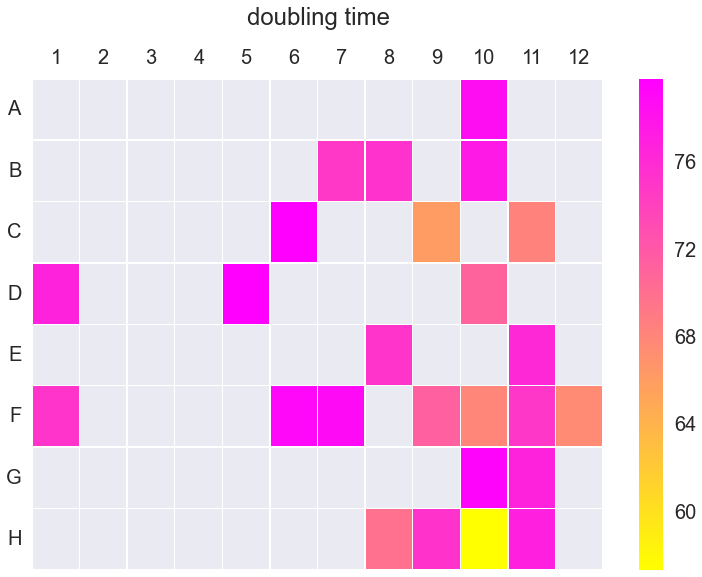

In [70]:
results_arr = np.empty((8, 12))  # assume 96-well plate
results_arr.fill(np.nan)
results_arr[(high_rates['row']-1), (high_rates['column']-1)] = high_rates['doubling time']
data = pd.DataFrame(results_arr, index=['A','B','C','D','E','F','G','H'], columns=range(1,13))
fig = sns.heatmap(data, cmap='spring_r', linewidths=0.01)
plt.yticks(rotation=0)
fig.xaxis.set_ticks_position('top')
plt.title('doubling time', y=1.1)

In [88]:
H12 = sliding_droplow.samples['H12']

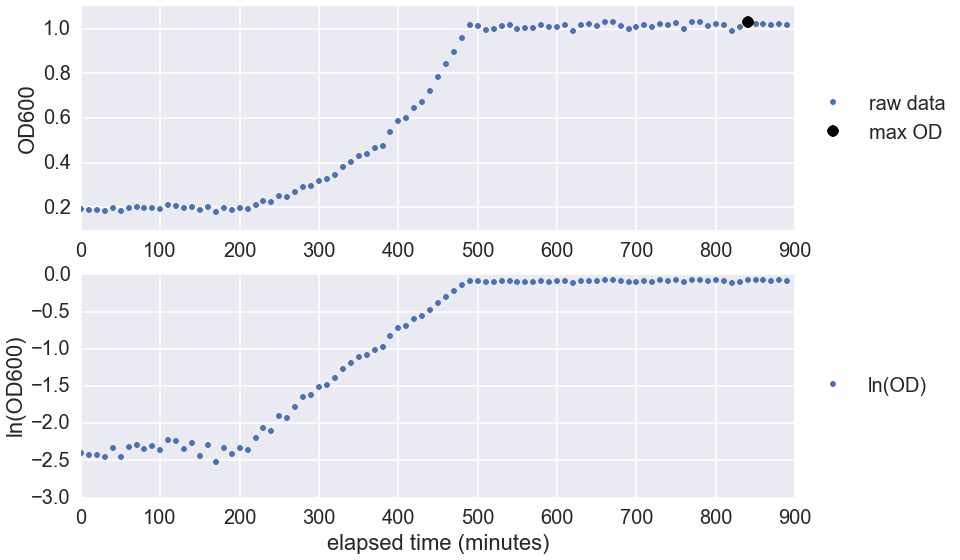

In [90]:
H12.plot_growth_parameters()

In [91]:
H12.log_data

array([-2.39766746, -2.42518608, -2.42912086, -2.46055105, -2.33392714,
       -2.4593685 , -2.32183486, -2.29266259, -2.34502377, -2.31209523,
       -2.35614198, -2.22124451, -2.24266491, -2.34892049, -2.2654229 ,
       -2.43861702, -2.29676339, -2.52397415, -2.33357418, -2.41967649,
       -2.33547761, -2.36575955, -2.1945891 , -2.06306931, -2.10009704,
       -1.90058204, -1.92685181, -1.78855325, -1.65160815, -1.62671576,
       -1.51296228, -1.48383852, -1.39953898, -1.26759051, -1.18833757,
       -1.10661128, -1.08094568, -1.01075653, -0.97949727, -0.82529089,
       -0.72368356, -0.69629754, -0.60485414, -0.55696899, -0.47353372,
       -0.37906227, -0.29960635, -0.22703027, -0.1500671 , -0.08430075,
       -0.08975317, -0.10929149, -0.10430338, -0.09260473, -0.08554334,
       -0.10532038, -0.10066374, -0.10012703, -0.08654925, -0.09720947,
       -0.09477185, -0.08660507, -0.11627886, -0.08892559, -0.08325599,
       -0.09349181, -0.07429469, -0.07215534, -0.09248376, -0.10

In [92]:
H12masked_data = np.ma.masked_less(np.copy(H12.log_data), -2.3)
H12data = H12masked_data
H12data

masked_array(data = [-- -- -- -- -- -- -- -2.2926625863396506 -- -- -- -2.221244514752376
 -2.2426649148632003 -- -2.2654228983541307 -- -2.296763387828665 -- -- --
 -- -- -2.1945891049028186 -2.063069308735665 -2.100097043394378
 -1.9005820420925903 -1.9268518132192594 -1.788553248359889
 -1.6516081543171055 -1.62671576382602 -1.5129622813133494
 -1.4838385229219568 -1.3995389757024916 -1.2675905106865308
 -1.188337570069252 -1.1066112762619735 -1.0809456795652062
 -1.0107565312328752 -0.9794972701575431 -0.8252908944844626
 -0.7236835621841857 -0.6962975424507061 -0.6048541399179322
 -0.5569689895148188 -0.4735337245717933 -0.3790622746778757
 -0.2996063464330321 -0.2270302746006712 -0.15006710332610435
 -0.08430075001200327 -0.08975317216549349 -0.10929149309288674
 -0.10430337837006634 -0.09260473316569064 -0.08554334161106757
 -0.10532037567944606 -0.10066373508246286 -0.10012703428471326
 -0.08654924949159278 -0.09720946919904888 -0.09477184883425631
 -0.08660506753575463 -0.1162

In [96]:
rates, intercepts, window_size = H12.sliding_window(H12data)
np.nanmax(rates)

0.0086066013062556582

In [94]:
rates

[nan,
 nan,
 nan,
 0.0017854517896818689,
 0.0012243815324298238,
 0.0012243815324298238,
 0.00050660282858849999,
 0.00050660282858849999,
 -0.001451086023881905,
 -0.001451086023881905,
 -0.001451086023881905,
 -0.001451086023881905,
 -0.0013524618241366193,
 -0.0015670244737267191,
 0.001074072179054334,
 0.0027679349388060838,
 0.002648845929810126,
 0.0084499345377197169,
 0.006979618500101932,
 0.0075381336301875781,
 0.0083972150095850372,
 0.0082628342542942698,
 0.0084076241682900978,
 0.0081688394082220245,
 0.0084034656277085593,
 0.0081032999367569355,
 0.0086066013062556582,
 0.0082487557550417635,
 0.0078474346607055965,
 0.0078759043909503584,
 0.0072521197439826667,
 0.0075256257996602991,
 0.0075730930792199096,
 0.0072387051159353054,
 0.0074414413225825588,
 0.0075192924191135602,
 0.0077821500960679997,
 0.0078335681586379803,
 0.0078297963041307969,
 0.0073851084628007114,
 0.0074844499013152904,
 0.0077435884791622524,
 0.0071289563868113057,
 0.006135189892242166